In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [13]:
# Load iris dataset
iris = datasets.load_iris()

# Convert to a Pandas DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add the species (target) as a column in the DataFrame
iris_df['species'] = iris.target
# Replace numerical species values with their actual species names
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [2]:
iris_data = iris.data
iris_target_names = iris.target_names
iris_features = iris.feature_names

print("iris_target_names: ", iris_target_names)
print("iris_features: ", iris_features)

iris_target_names:  ['setosa' 'versicolor' 'virginica']
iris_features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# Tasks with the iris dataset

- Sample visualization tasks:
    - Task 1: Create a histogram for each feature in the iris dataset
    - Task 2: Create a histogram plot of petal length (or any other feature) for each class label
- Think about what other visualizations can be helpful in understanding the iris dataset
    - Refer to lec01_basic_charts.ipynb for some ideas

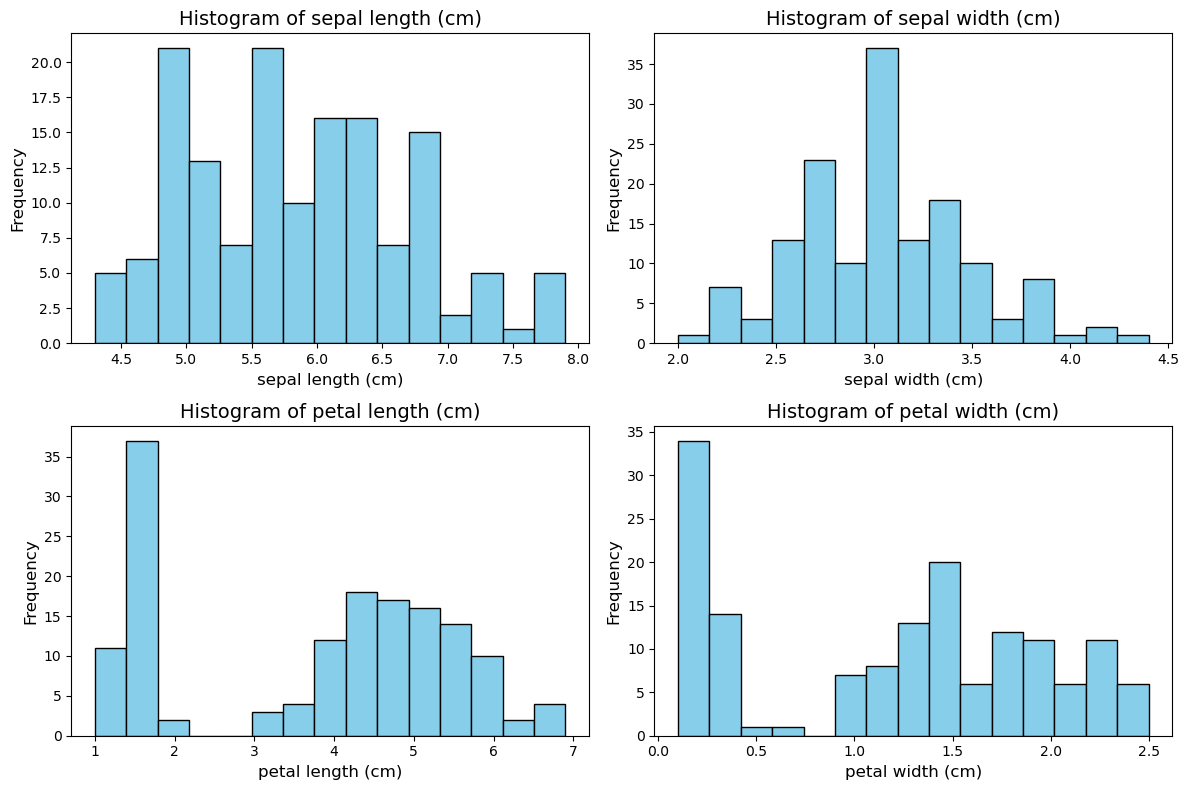

In [3]:
# Create a histogram for each feature in the iris dataset
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Titles for each subplot
feature_names = iris_features

# Plot histograms for each feature
for i, axi in enumerate(ax.flat):
    axi.hist(iris_data[:, i], bins=15, color='skyblue', edgecolor='black')
    axi.set_title(f'Histogram of {feature_names[i]}', fontsize=14)
    axi.set_xlabel(feature_names[i], fontsize=12)
    axi.set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

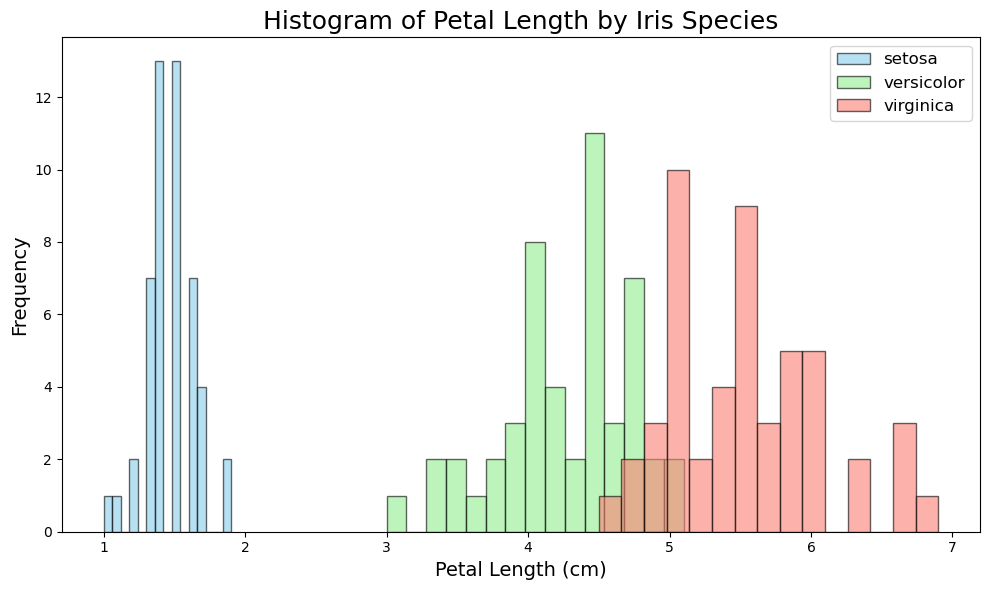

In [5]:
# Extract the petal length and class labels from the iris dataset
petal_length = iris_data[:, 2]  # Petal length is the third feature
class_labels = iris.target  # Class labels (0, 1, 2 for different species)

# Create a histogram plot of petal length for each class label
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each class
colors = ['skyblue', 'lightgreen', 'salmon']

# Plot histograms for each class label
for i in range(len(iris_target_names)):
    ax.hist(petal_length[class_labels == i], bins=15, color=colors[i], edgecolor='black', alpha=0.6, 
            label=iris_target_names[i])

# Add overall titles and labels
ax.set_title('Histogram of Petal Length by Iris Species', fontsize=18)
ax.set_xlabel('Petal Length (cm)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()


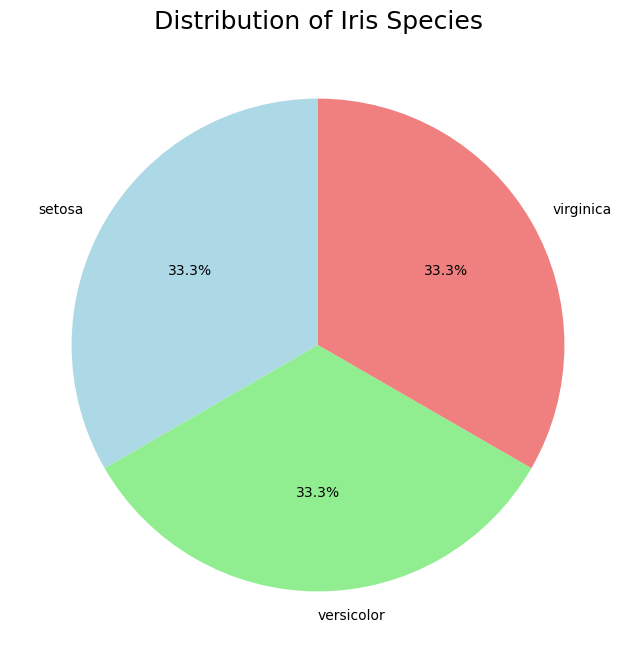

In [14]:
# Count occurrences of each species
species_count = iris_df['species'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(species_count, labels=iris_target_names, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=90)
plt.title('Distribution of Iris Species', fontsize=18)
plt.show()

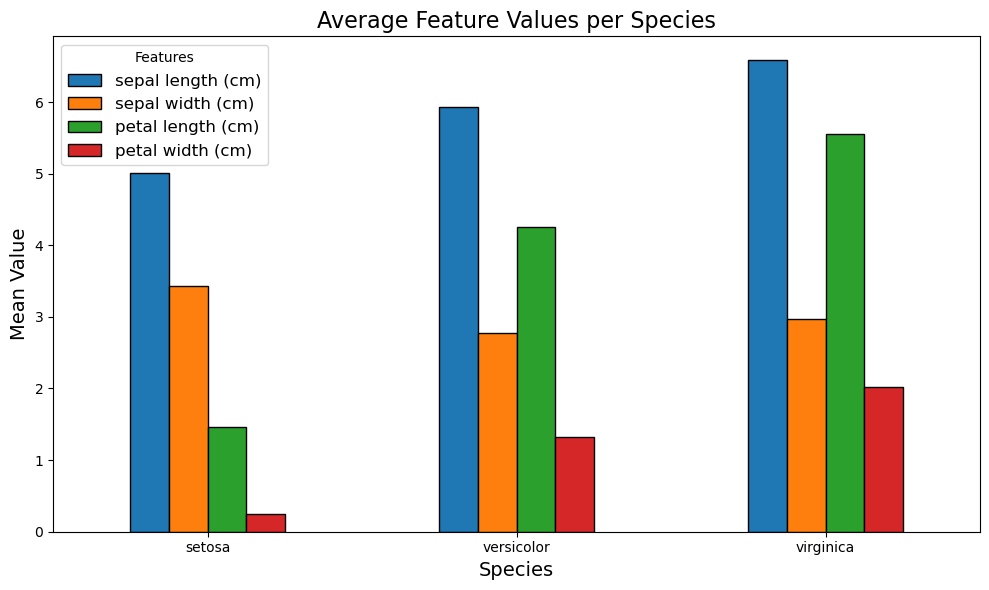

In [15]:
# Calculate mean values for each species
iris_mean = iris_df.groupby('species').mean()

# Plot a bar chart for the mean of each feature by species
iris_mean.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Average Feature Values per Species', fontsize=16)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Features', fontsize=12)
plt.tight_layout()
plt.show()

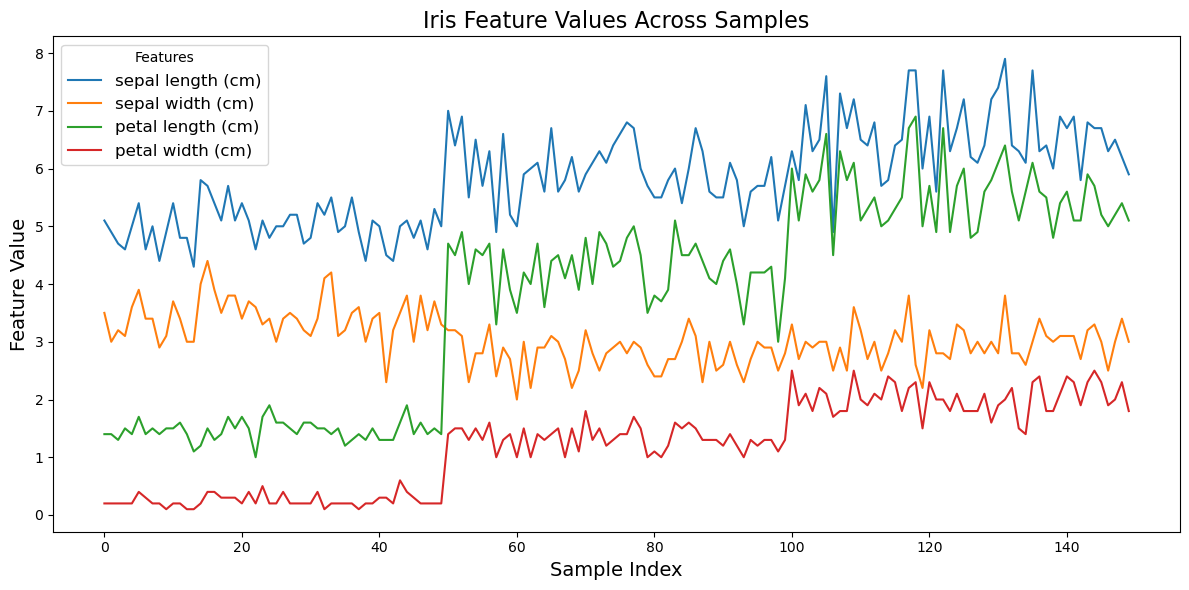

In [16]:
# Plot feature values for each sample
plt.figure(figsize=(12, 6))

# Line plot for each feature
for i, feature in enumerate(iris_df.columns[:-1]):  # Exclude 'species' column
    plt.plot(iris_df.index, iris_df[feature], label=feature)

plt.title('Iris Feature Values Across Samples', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Feature Value', fontsize=14)
plt.legend(title='Features', fontsize=12)
plt.tight_layout()
plt.show()

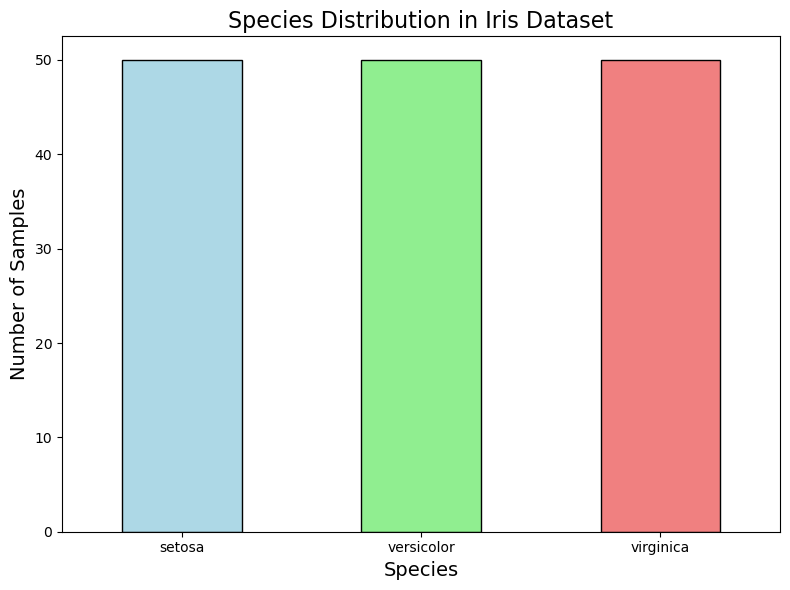

In [17]:
# Count the number of samples for each species
species_count = iris_df['species'].value_counts()

# Plot the bar chart
species_count.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral'], edgecolor='black', figsize=(8, 6))
plt.title('Species Distribution in Iris Dataset', fontsize=16)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

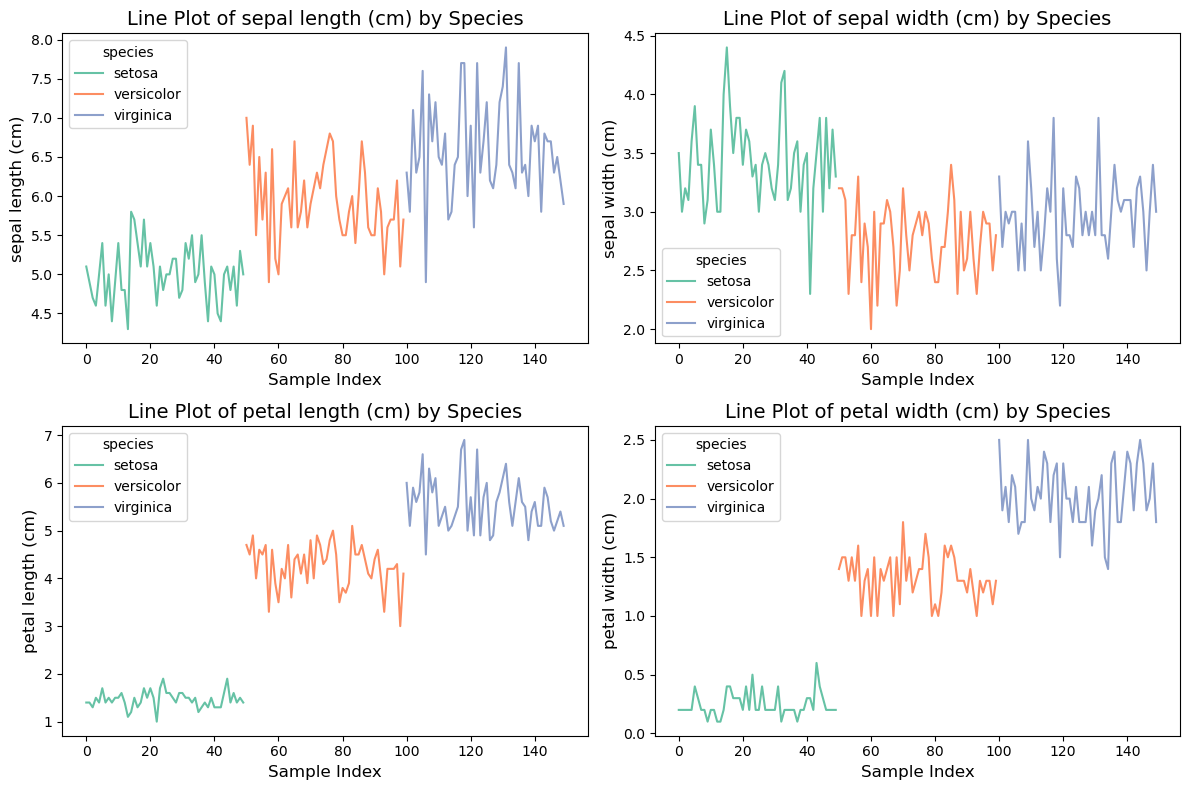

In [18]:
# Create line plots for each feature across species
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
for i, axi in enumerate(ax.flat):
    sns.lineplot(data=iris_df, x=iris_df.index, y=iris_df.columns[i], hue='species', ax=axi, palette='Set2')
    axi.set_title(f'Line Plot of {iris_features[i]} by Species', fontsize=14)
    axi.set_xlabel('Sample Index', fontsize=12)
    axi.set_ylabel(iris_features[i], fontsize=12)

plt.tight_layout()
plt.show()